In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11
)

In [3]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- 모델 시각화

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, out_file='tree.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
)

In [8]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

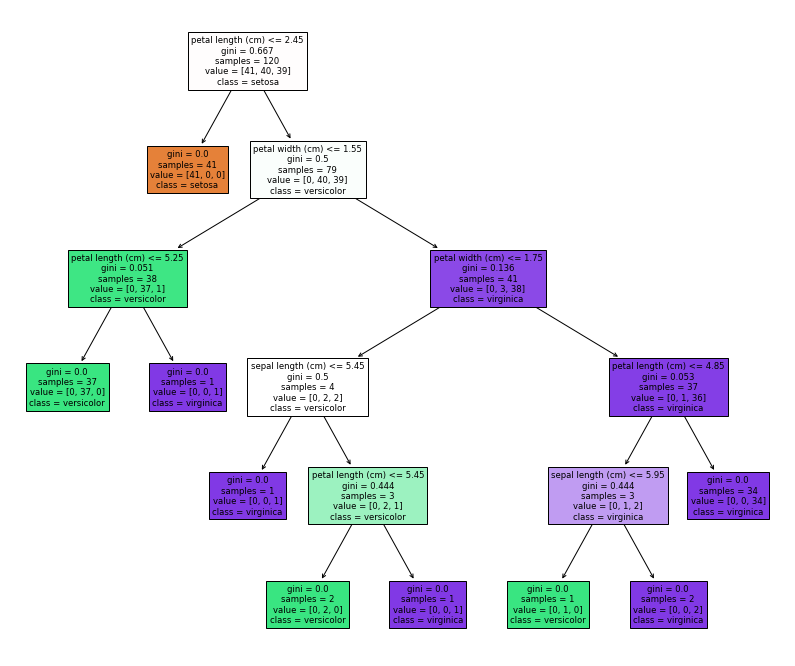

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
plot_tree(dtc, class_names=iris.target_names, feature_names=iris.feature_names, filled=True)
plt.show()

### 제약조건

- max_depth = 3

In [11]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc2, out_file='tree2.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
)

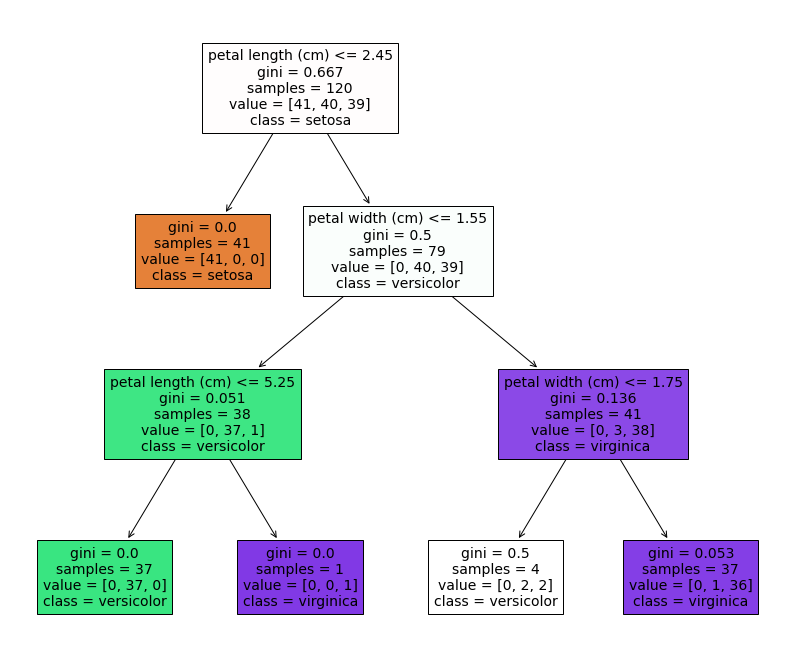

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
plot_tree(dtc2, class_names=iris.target_names, feature_names=iris.feature_names, filled=True)
plt.show()

- min_samples_split = 4

In [15]:
dtc3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dtc3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

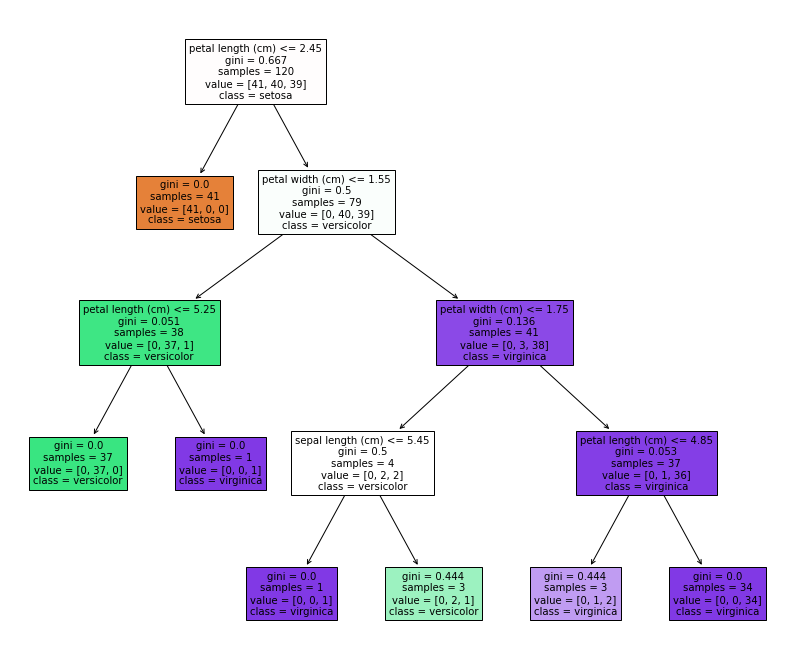

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
plot_tree(dtc3, class_names=iris.target_names, feature_names=iris.feature_names, filled=True)
plt.show()

- min_samples_leaf = 2

In [17]:
dtc4 = DecisionTreeClassifier(min_samples_leaf = 2, random_state=156)
dtc4.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=156)

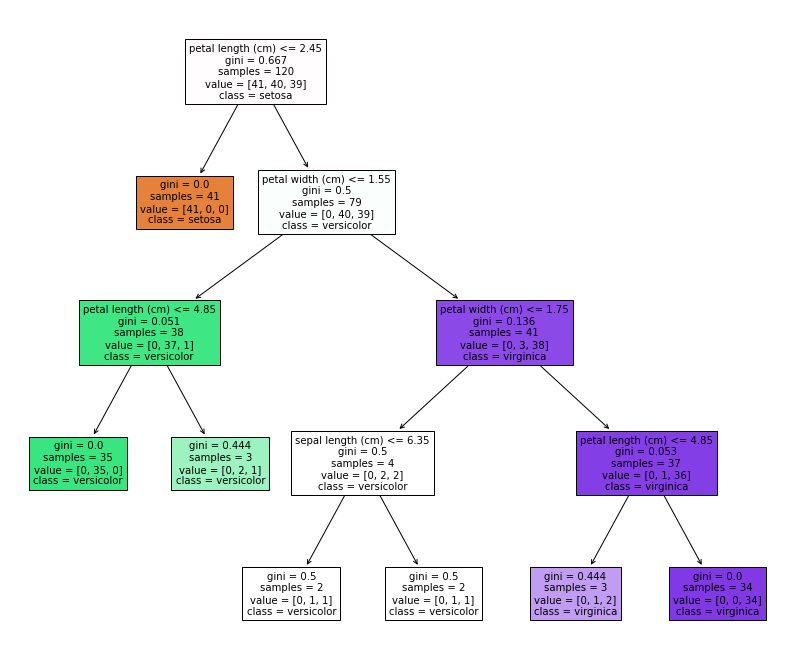

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
plot_tree(dtc4, class_names=iris.target_names, feature_names=iris.feature_names, filled=True)
plt.show()

### 학습된 모델이 제공하는 정보

- Feature importance

In [19]:
dtc.feature_importances_ # 분류하는데 중요한 정보가 무엇인가

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [20]:
dtc2.feature_importances_

array([0.        , 0.        , 0.55810743, 0.44189257])

In [21]:
dtc3.feature_importances_

array([0.00862255, 0.        , 0.55679642, 0.43458103])

In [22]:
dtc4.feature_importances_

array([0.        , 0.        , 0.55387887, 0.44612113])

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


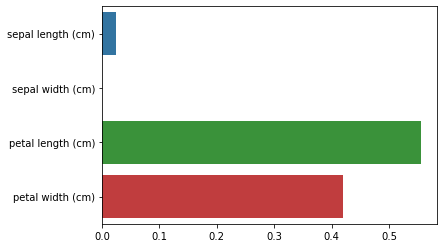

In [23]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
plt.show()